In [1]:
#library import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
#load datasets
data = pd.read_csv("breast-cancer-wisconsin.csv",names=names)
data.head(10)

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2
5,1017122,8,10,10,8,7,9,7,1,4
6,1018099,1,1,1,1,2,3,1,1,2
7,1018561,2,1,2,1,2,3,1,1,2
8,1033078,2,1,1,1,2,1,1,5,2
9,1033078,4,2,1,1,2,2,1,1,2


In [3]:
data.info()
print("\n data size:",data.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   id                      699 non-null    int64
 1   clump_thickness         699 non-null    int64
 2   uniform_cell_size       699 non-null    int64
 3   uniform_cell_shape      699 non-null    int64
 4   marginal_adhesion       699 non-null    int64
 5   single_epithelial_size  699 non-null    int64
 6   bland_chromatin         699 non-null    int64
 7   normal_nucleoli         699 non-null    int64
 8   mitoses                 699 non-null    int64
 9   class                   699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB

 data size: 6990


# Exploratory Data Analysis

In [4]:
df=data.drop('id',axis=1)
categorical_val = []
continous_val = []

for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

[]

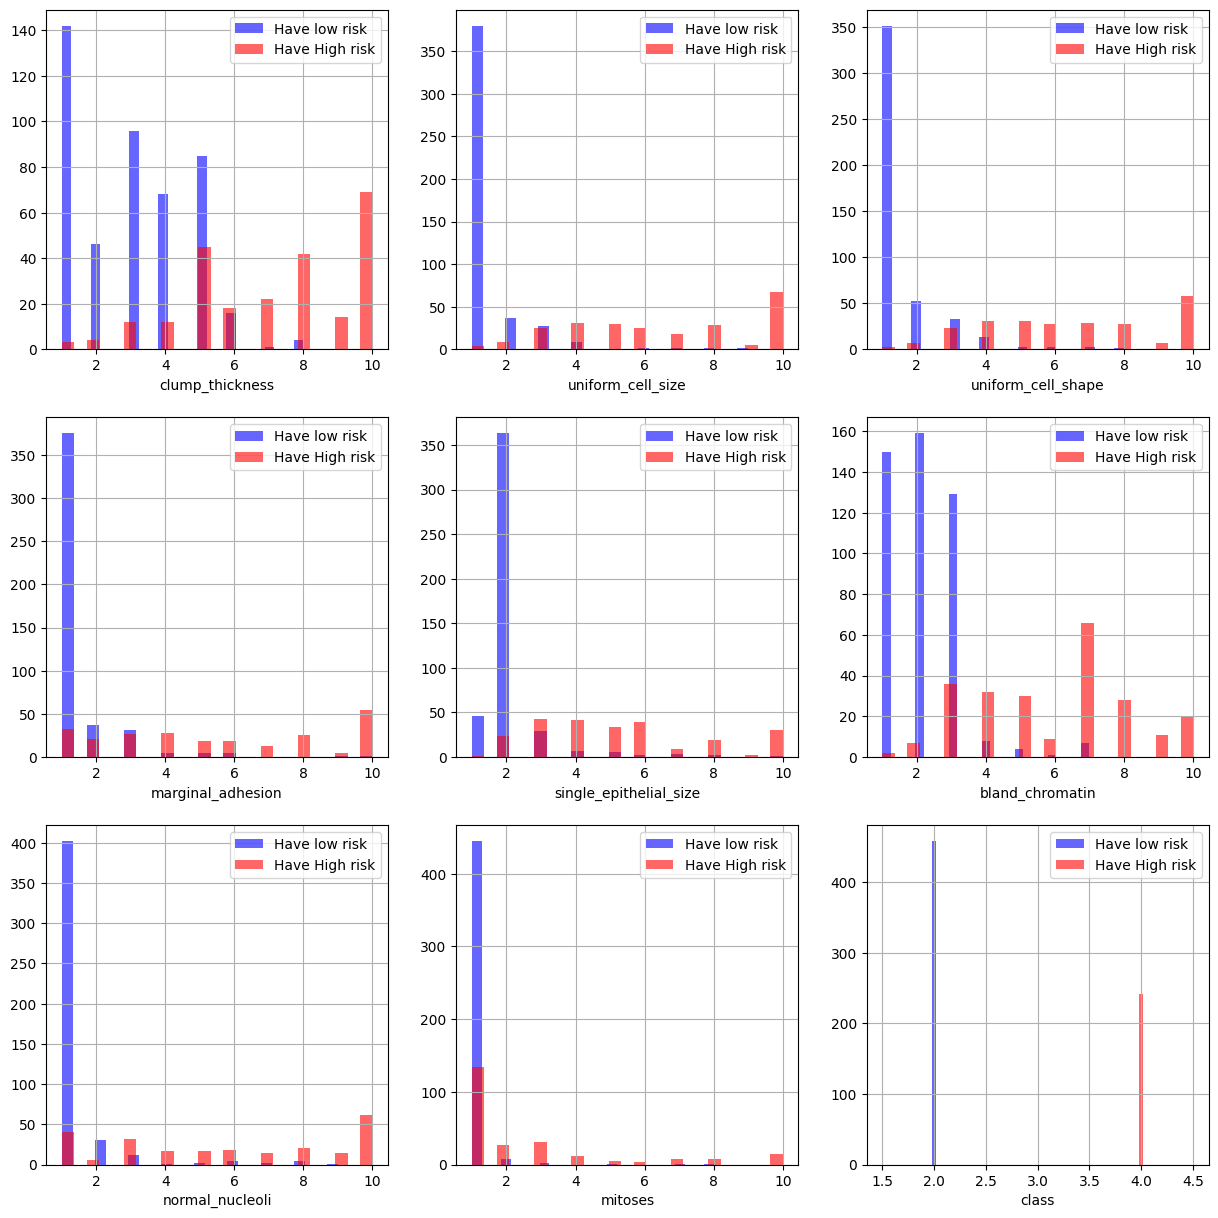

In [5]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["class"] == 2][column].hist(bins=25, color='blue', label='Have low risk', alpha=0.6)
    df[df["class"] == 4][column].hist(bins=25, color='red', label="Have High risk", alpha=0.6)
    plt.legend()
    plt.xlabel(column)
plt.plot()

In [6]:
df.corr()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
uniform_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
single_epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


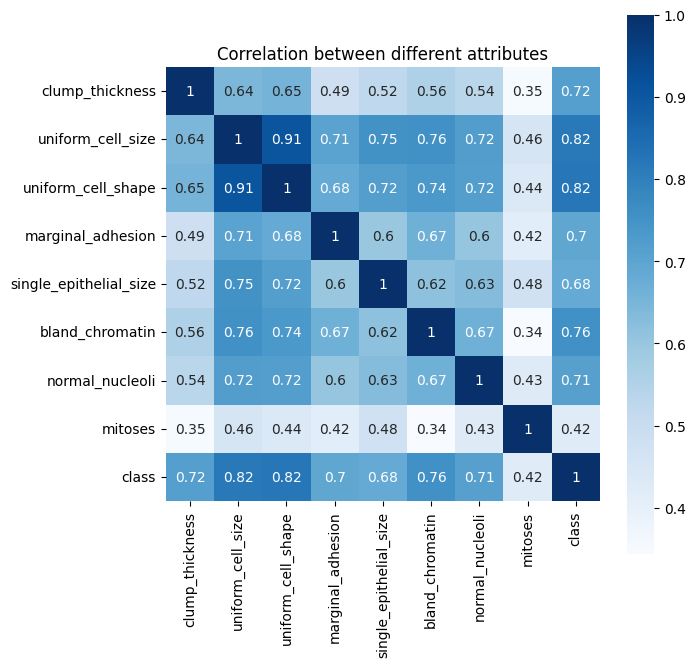

In [7]:
plt.figure(figsize=(7,7))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [8]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

clump_thickness           0.716001
uniform_cell_size         0.817904
uniform_cell_shape        0.818934
marginal_adhesion         0.696800
single_epithelial_size    0.682785
bland_chromatin           0.756616
normal_nucleoli           0.712244
mitoses                   0.423170
class                     1.000000
Name: class, dtype: float64

# Training and Testing Datasets over Several Model

In [9]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 
Y = df['class'].values
X = df.drop('class', axis=1).values
# standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25,random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(524, 8) (175, 8) (524,) (175,)


In [10]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('LGR', LogisticRegression()))
models.append(('RDC',RandomForestClassifier(n_estimators=20)))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model: Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model: Mean accuracy is 0.923803 (Std accuracy is 0.036788)
For SVM Model: Mean accuracy is 0.961974 (Std accuracy is 0.025316)
For NB Model: Mean accuracy is 0.958164 (Std accuracy is 0.026397)
For KNN Model: Mean accuracy is 0.958128 (Std accuracy is 0.027882)
For LGR Model: Mean accuracy is 0.958128 (Std accuracy is 0.025089)
For RDC Model: Mean accuracy is 0.967707 (Std accuracy is 0.029382)


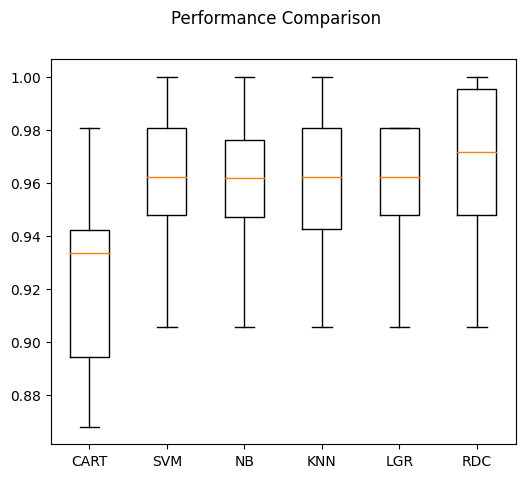

In [11]:
fig = plt.figure(figsize=(6,5))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
best_model = None
best_accuracy = 0.0
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    print("\nModel:",name)
    print("Accuracy score:",accuracy)
    print("Classification report:\n",classification_report(Y_test, predictions))
    
    # Update the best model if this model has higher accuracy
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy


Model: CART
Accuracy score: 0.92
Classification report:
               precision    recall  f1-score   support

           2       0.92      0.96      0.94       112
           4       0.92      0.86      0.89        63

    accuracy                           0.92       175
   macro avg       0.92      0.91      0.91       175
weighted avg       0.92      0.92      0.92       175


Model: SVM
Accuracy score: 0.96
Classification report:
               precision    recall  f1-score   support

           2       0.97      0.96      0.97       112
           4       0.94      0.95      0.94        63

    accuracy                           0.96       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.96      0.96      0.96       175


Model: NB
Accuracy score: 0.9428571428571428
Classification report:
               precision    recall  f1-score   support

           2       0.96      0.95      0.95       112
           4       0.91      0.94      0.92        6

In [13]:
# Use the best model to predict on test data
if best_model is not None:
    test_predictions = best_model.predict(X_test)
    print("Best Model:",best_model.__class__.__name__)
    print("Accuracy score:",accuracy_score(Y_test, test_predictions))
    print("Classification report:\n",classification_report(Y_test, test_predictions))
    print("Test Data prediction:\n",test_predictions)
else:
    print("No model was found with accuracy greater than 0.0")


Best Model: RandomForestClassifier
Accuracy score: 0.9714285714285714
Classification report:
               precision    recall  f1-score   support

           2       0.98      0.97      0.98       112
           4       0.95      0.97      0.96        63

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175

Test Data prediction:
 [2 2 4 2 4 2 4 2 4 4 2 2 4 4 4 2 2 4 4 2 4 4 2 2 2 4 2 2 4 4 2 2 2 2 2 2 2
 4 2 2 2 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 2 4
 4 4 2 2 2 2 2 4 4 4 4 2 4 2 2 4 4 4 4 4 2 2 4 4 2 2 4 2 2 4 4 2 2 2 2 2 2
 2 2 2 4 4 4 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 4 2 2 2 2]


Iteration 1: Accuracy score is 0.948571


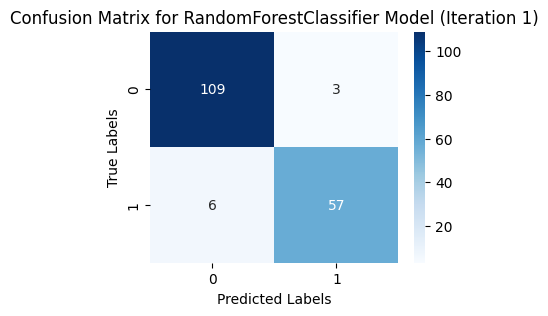

Iteration 2: Accuracy score is 0.971429


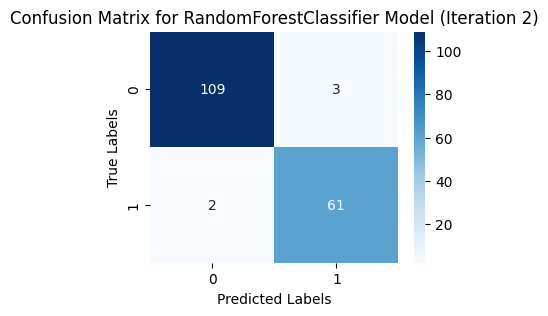

Maximum accuracy reached after 3 iterations: 0.971429


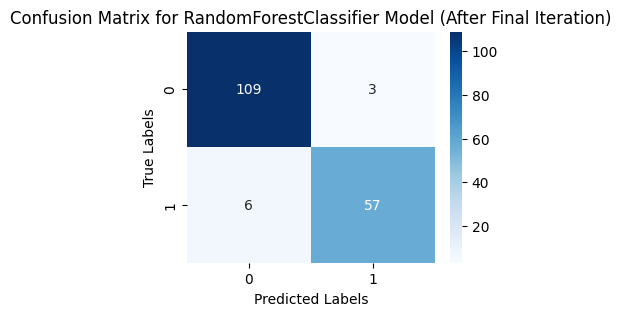

In [14]:
# Iterate over best model with updated predictions until maximum accuracy is reached
max_accuracy = 0.0
iterations = 0
while True:
    iterations += 1
    best_model.fit(X_train, Y_train)
    predictions = best_model.predict(X_test)
    new_accuracy = accuracy_score(Y_test, predictions)
    if new_accuracy > max_accuracy:
        max_accuracy = new_accuracy
        print("Iteration %d: Accuracy score is %f" % (iterations, max_accuracy))
        cm = confusion_matrix(Y_test, predictions)
        plt.figure(figsize=(4,3))
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
        plt.title("Confusion Matrix for %s Model (Iteration %d)" % (best_model.__class__.__name__, iterations))
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()
    else:
        print("Maximum accuracy reached after %d iterations: %f" % (iterations, max_accuracy))
        cm = confusion_matrix(Y_test, predictions)
        plt.figure(figsize=(4,3))
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
        plt.title("Confusion Matrix for %s Model (After Final Iteration)" % (best_model.__class__.__name__))
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()
        break
